In [26]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from pylab import savefig
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import datetime

In [27]:
data = pd.read_csv(r"C:\Users\Sheikh Nabil\Anaconda\Desktop\Capital bikeshare\Week 1\dataset\202011-capitalbikeshare-tripdata.csv")

In [28]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,3E9F5B869776AA79,docked_bike,2020-11-06 08:52:34,2020-11-06 09:06:59,7th & S St NW,630.0,17th & G St NW,395.0,38.914204,-77.022174,38.898283,-77.039732,casual
1,8D7965CD06B35CC6,docked_bike,2020-11-07 14:35:54,2020-11-07 14:54:37,19th St & Constitution Ave NW,151.0,24th & N St NW,272.0,38.892300,-77.043600,38.906600,-77.051520,casual
2,7A6B7A9A2867E5E4,docked_bike,2020-11-20 15:36:14,2020-11-20 15:49:32,14th & L St NW,433.0,15th St & Constitution Ave NW,531.0,38.903658,-77.031737,38.892244,-77.033234,casual
3,648BEF4F48FC06D8,docked_bike,2020-11-07 11:40:45,2020-11-07 12:00:29,1st & M St NE,65.0,13th & U St NW,681.0,38.905697,-77.005483,38.916936,-77.029631,casual
4,0270180623442083,docked_bike,2020-11-16 09:30:05,2020-11-16 09:50:22,3rd & Elm St NW,80.0,10th & Florida Ave NW,82.0,38.917622,-77.015970,38.920387,-77.025672,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175784,1AAF0CF2FC03AC73,electric_bike,2020-11-10 11:10:51,2020-11-10 11:55:07,NaN,NaN,NaN,NaN,38.910000,-77.000000,38.910000,-77.010000,casual
175785,E47F4E73BFCA8366,electric_bike,2020-11-10 13:40:56,2020-11-10 14:10:00,NaN,NaN,NaN,NaN,38.920000,-77.010000,39.000000,-77.030000,casual
175786,1BEF45AEBA57DAD2,electric_bike,2020-11-10 13:37:16,2020-11-10 13:46:17,Wisconsin Ave & Newark St NW,105.0,NaN,NaN,38.934947,-77.072849,38.950000,-77.080000,casual
175787,B1CDC8FD1EE8182D,electric_bike,2020-11-10 15:05:42,2020-11-10 15:09:21,NaN,NaN,NaN,NaN,38.950000,-77.080000,38.950000,-77.080000,casual


In [29]:
data['started_at'] = pd.to_datetime(data['started_at'])

data['date'] = data['started_at'].dt.date

data['time'] = data['started_at'].dt.time
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,time
0,3E9F5B869776AA79,docked_bike,2020-11-06 08:52:34,2020-11-06 09:06:59,7th & S St NW,630.0,17th & G St NW,395.0,38.914204,-77.022174,38.898283,-77.039732,casual,2020-11-06,08:52:34
1,8D7965CD06B35CC6,docked_bike,2020-11-07 14:35:54,2020-11-07 14:54:37,19th St & Constitution Ave NW,151.0,24th & N St NW,272.0,38.892300,-77.043600,38.906600,-77.051520,casual,2020-11-07,14:35:54
2,7A6B7A9A2867E5E4,docked_bike,2020-11-20 15:36:14,2020-11-20 15:49:32,14th & L St NW,433.0,15th St & Constitution Ave NW,531.0,38.903658,-77.031737,38.892244,-77.033234,casual,2020-11-20,15:36:14
3,648BEF4F48FC06D8,docked_bike,2020-11-07 11:40:45,2020-11-07 12:00:29,1st & M St NE,65.0,13th & U St NW,681.0,38.905697,-77.005483,38.916936,-77.029631,casual,2020-11-07,11:40:45
4,0270180623442083,docked_bike,2020-11-16 09:30:05,2020-11-16 09:50:22,3rd & Elm St NW,80.0,10th & Florida Ave NW,82.0,38.917622,-77.015970,38.920387,-77.025672,member,2020-11-16,09:30:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175784,1AAF0CF2FC03AC73,electric_bike,2020-11-10 11:10:51,2020-11-10 11:55:07,NaN,NaN,NaN,NaN,38.910000,-77.000000,38.910000,-77.010000,casual,2020-11-10,11:10:51
175785,E47F4E73BFCA8366,electric_bike,2020-11-10 13:40:56,2020-11-10 14:10:00,NaN,NaN,NaN,NaN,38.920000,-77.010000,39.000000,-77.030000,casual,2020-11-10,13:40:56
175786,1BEF45AEBA57DAD2,electric_bike,2020-11-10 13:37:16,2020-11-10 13:46:17,Wisconsin Ave & Newark St NW,105.0,NaN,NaN,38.934947,-77.072849,38.950000,-77.080000,casual,2020-11-10,13:37:16
175787,B1CDC8FD1EE8182D,electric_bike,2020-11-10 15:05:42,2020-11-10 15:09:21,NaN,NaN,NaN,NaN,38.950000,-77.080000,38.950000,-77.080000,casual,2020-11-10,15:05:42


In [30]:
data['member_casual'].value_counts()

member    101758
casual     74031
Name: member_casual, dtype: int64

In [31]:
data['date'] = pd.to_datetime(data['date'])
data.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at                      object
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id               float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
time                          object
dtype: object

In [32]:
print(data.index)

RangeIndex(start=0, stop=175789, step=1)


In [33]:
dt = data['end_station_name'].value_counts()
dt

15th & P St NW                      1865
New Hampshire Ave & T St NW         1848
1st & M St NE                       1610
14th & V St NW                      1562
Jefferson Dr & 14th St SW           1555
                                    ... 
Medical Center Dr & Key West Ave       1
19th & Savannah St SE                  1
Ridge Rd Community Center              1
Jones Branch & Westbranch Dr           1
Reston Pkwy & Spectrum Dr              1
Name: end_station_name, Length: 612, dtype: int64

In [34]:
dt.head(30)

15th & P St NW                                           1865
New Hampshire Ave & T St NW                              1848
1st & M St NE                                            1610
14th & V St NW                                           1562
Jefferson Dr & 14th St SW                                1555
Henry Bacon Dr & Lincoln Memorial Circle NW              1507
Lincoln Memorial                                         1493
4th St & Madison Dr NW                                   1450
8th & O St NW                                            1316
15th & W St NW                                           1309
11th & M St NW                                           1294
Massachusetts Ave & Dupont Circle NW                     1285
4th & M St SW                                            1278
14th & R St NW                                           1264
New Hampshire Ave & Ward Pl NW                           1260
17th & Corcoran St NW                                    1259
3rd & M 

In [35]:
data.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at                      object
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id               float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
time                          object
dtype: object

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175789 entries, 0 to 175788
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             175789 non-null  object        
 1   rideable_type       175789 non-null  object        
 2   started_at          175789 non-null  datetime64[ns]
 3   ended_at            175789 non-null  object        
 4   start_station_name  160685 non-null  object        
 5   start_station_id    160685 non-null  float64       
 6   end_station_name    159114 non-null  object        
 7   end_station_id      159114 non-null  float64       
 8   start_lat           175789 non-null  float64       
 9   start_lng           175789 non-null  float64       
 10  end_lat             175145 non-null  float64       
 11  end_lng             175145 non-null  float64       
 12  member_casual       175789 non-null  object        
 13  date                175789 no

In [37]:
data.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    15104
start_station_id      15104
end_station_name      16675
end_station_id        16675
start_lat                 0
start_lng                 0
end_lat                 644
end_lng                 644
member_casual             0
date                      0
time                      0
dtype: int64

In [38]:
data['Week_Number'] = data['date'].dt.week
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,time,Week_Number
0,3E9F5B869776AA79,docked_bike,2020-11-06 08:52:34,2020-11-06 09:06:59,7th & S St NW,630.0,17th & G St NW,395.0,38.914204,-77.022174,38.898283,-77.039732,casual,2020-11-06,08:52:34,45
1,8D7965CD06B35CC6,docked_bike,2020-11-07 14:35:54,2020-11-07 14:54:37,19th St & Constitution Ave NW,151.0,24th & N St NW,272.0,38.892300,-77.043600,38.906600,-77.051520,casual,2020-11-07,14:35:54,45
2,7A6B7A9A2867E5E4,docked_bike,2020-11-20 15:36:14,2020-11-20 15:49:32,14th & L St NW,433.0,15th St & Constitution Ave NW,531.0,38.903658,-77.031737,38.892244,-77.033234,casual,2020-11-20,15:36:14,47
3,648BEF4F48FC06D8,docked_bike,2020-11-07 11:40:45,2020-11-07 12:00:29,1st & M St NE,65.0,13th & U St NW,681.0,38.905697,-77.005483,38.916936,-77.029631,casual,2020-11-07,11:40:45,45
4,0270180623442083,docked_bike,2020-11-16 09:30:05,2020-11-16 09:50:22,3rd & Elm St NW,80.0,10th & Florida Ave NW,82.0,38.917622,-77.015970,38.920387,-77.025672,member,2020-11-16,09:30:05,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175784,1AAF0CF2FC03AC73,electric_bike,2020-11-10 11:10:51,2020-11-10 11:55:07,NaN,NaN,NaN,NaN,38.910000,-77.000000,38.910000,-77.010000,casual,2020-11-10,11:10:51,46
175785,E47F4E73BFCA8366,electric_bike,2020-11-10 13:40:56,2020-11-10 14:10:00,NaN,NaN,NaN,NaN,38.920000,-77.010000,39.000000,-77.030000,casual,2020-11-10,13:40:56,46
175786,1BEF45AEBA57DAD2,electric_bike,2020-11-10 13:37:16,2020-11-10 13:46:17,Wisconsin Ave & Newark St NW,105.0,NaN,NaN,38.934947,-77.072849,38.950000,-77.080000,casual,2020-11-10,13:37:16,46
175787,B1CDC8FD1EE8182D,electric_bike,2020-11-10 15:05:42,2020-11-10 15:09:21,NaN,NaN,NaN,NaN,38.950000,-77.080000,38.950000,-77.080000,casual,2020-11-10,15:05:42,46


In [50]:
data['date'].min()

Timestamp('2020-11-01 00:00:00')

In [39]:
w_48 = data[data['Week_Number'] == 48]
w_48

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,time,Week_Number
17,CB2ADB97D26B301D,docked_bike,2020-11-23 09:25:14,2020-11-23 09:28:50,3rd & D St SE,67.0,1st & K St SE,192.0,38.885100,-77.002300,38.878854,-77.005727,member,2020-11-23,09:25:14,48
18,4295B1D5F09DFCBE,docked_bike,2020-11-23 06:33:48,2020-11-23 06:38:54,1st & K St SE,192.0,3rd & D St SE,67.0,38.878854,-77.005727,38.885100,-77.002300,member,2020-11-23,06:33:48,48
22,60953307EBDAFE08,docked_bike,2020-11-23 05:54:18,2020-11-23 05:59:49,Maryland Ave & E St NE,417.0,Columbus Circle / Union Station,156.0,38.896134,-76.992900,38.896960,-77.004930,member,2020-11-23,05:54:18,48
29,333DAE95B2D45489,docked_bike,2020-11-23 10:56:00,2020-11-23 11:00:02,Eastern Market Metro / Pennsylvania Ave & 8th ...,120.0,13th & E St SE,69.0,38.884260,-76.994735,38.882915,-76.987907,member,2020-11-23,10:56:00,48
30,D8CD29A43443CFEC,docked_bike,2020-11-24 07:24:59,2020-11-24 07:27:30,12th St & Pennsylvania Ave SE,497.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,120.0,38.882489,-76.990121,38.884260,-76.994736,member,2020-11-24,07:24:59,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175762,BD0BB3CA0C93E029,electric_bike,2020-11-24 11:03:23,2020-11-24 12:27:13,NaN,NaN,NaN,NaN,38.930000,-77.110000,38.930000,-77.110000,casual,2020-11-24,11:03:23,48
175766,4DF1A99FFB408D80,electric_bike,2020-11-24 15:10:10,2020-11-24 15:23:42,7th & R St NW / Shaw Library,183.0,25th St & Pennsylvania Ave NW,153.0,38.912673,-77.022604,38.903902,-77.053025,casual,2020-11-24,15:10:10,48
175767,4751058F050CD430,electric_bike,2020-11-24 11:56:43,2020-11-24 12:26:41,NaN,NaN,NaN,NaN,38.930000,-77.030000,38.930000,-77.030000,casual,2020-11-24,11:56:43,48
175768,E0DCFFC86ED9C70D,electric_bike,2020-11-24 12:35:51,2020-11-24 12:46:32,3rd & H St NE,137.0,M St & New Jersey Ave SE,32.0,38.900302,-77.002297,38.876667,-77.003694,casual,2020-11-24,12:35:51,48


In [51]:
w_48.loc[w_48['date'] == '2020-11-23', 'Day'] = 'Monday'
w_48.loc[w_48['date'] == '2020-11-24', 'Day'] = 'Tuesday'
w_48.loc[w_48['date'] == '2020-11-25', 'Day'] = 'Wednesday'
w_48.loc[w_48['date'] == '2020-11-26', 'Day'] = 'Thursday'
w_48.loc[w_48['date'] == '2020-11-27', 'Day'] = 'Friday'
# w_48.loc[w_48['date'] == '2020-11-28', 'Day'] = 'Saturday'
# w_48.loc[w_48['date'] == '2020-11-29', 'Day'] = 'sunday'
w_48

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,time,Week_Number,Day
17,CB2ADB97D26B301D,docked_bike,2020-11-23 09:25:14,2020-11-23 09:28:50,3rd & D St SE,67.0,1st & K St SE,192.0,38.885100,-77.002300,38.878854,-77.005727,member,2020-11-23,09:25:14,48,Monday
18,4295B1D5F09DFCBE,docked_bike,2020-11-23 06:33:48,2020-11-23 06:38:54,1st & K St SE,192.0,3rd & D St SE,67.0,38.878854,-77.005727,38.885100,-77.002300,member,2020-11-23,06:33:48,48,Monday
22,60953307EBDAFE08,docked_bike,2020-11-23 05:54:18,2020-11-23 05:59:49,Maryland Ave & E St NE,417.0,Columbus Circle / Union Station,156.0,38.896134,-76.992900,38.896960,-77.004930,member,2020-11-23,05:54:18,48,Monday
29,333DAE95B2D45489,docked_bike,2020-11-23 10:56:00,2020-11-23 11:00:02,Eastern Market Metro / Pennsylvania Ave & 8th ...,120.0,13th & E St SE,69.0,38.884260,-76.994735,38.882915,-76.987907,member,2020-11-23,10:56:00,48,Monday
30,D8CD29A43443CFEC,docked_bike,2020-11-24 07:24:59,2020-11-24 07:27:30,12th St & Pennsylvania Ave SE,497.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,120.0,38.882489,-76.990121,38.884260,-76.994736,member,2020-11-24,07:24:59,48,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175762,BD0BB3CA0C93E029,electric_bike,2020-11-24 11:03:23,2020-11-24 12:27:13,NaN,NaN,NaN,NaN,38.930000,-77.110000,38.930000,-77.110000,casual,2020-11-24,11:03:23,48,Tuesday
175766,4DF1A99FFB408D80,electric_bike,2020-11-24 15:10:10,2020-11-24 15:23:42,7th & R St NW / Shaw Library,183.0,25th St & Pennsylvania Ave NW,153.0,38.912673,-77.022604,38.903902,-77.053025,casual,2020-11-24,15:10:10,48,Tuesday
175767,4751058F050CD430,electric_bike,2020-11-24 11:56:43,2020-11-24 12:26:41,NaN,NaN,NaN,NaN,38.930000,-77.030000,38.930000,-77.030000,casual,2020-11-24,11:56:43,48,Tuesday
175768,E0DCFFC86ED9C70D,electric_bike,2020-11-24 12:35:51,2020-11-24 12:46:32,3rd & H St NE,137.0,M St & New Jersey Ave SE,32.0,38.900302,-77.002297,38.876667,-77.003694,casual,2020-11-24,12:35:51,48,Tuesday


In [52]:
w_48.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name    3096
start_station_id      3096
end_station_name      3409
end_station_id        3409
start_lat                0
start_lng                0
end_lat                 96
end_lng                 96
member_casual            0
date                     0
time                     0
Week_Number              0
Day                      0
dtype: int64

In [41]:
w_48['Day'].value_counts()

Saturday     6897
Friday       5685
sunday       5628
Wednesday    4532
Tuesday      4391
Thursday     4191
Monday       3967
Name: Day, dtype: int64

In [42]:
df_plot = w_48.groupby(['member_casual', 'Day']).size().reset_index().pivot(columns='member_casual', index='Day', values=0)
df_plot.sort_values

<bound method DataFrame.sort_values of member_casual  casual  member
Day                          
Friday           2997    2688
Monday           1271    2696
Saturday         3553    3344
Thursday         2115    2076
Tuesday          1537    2854
Wednesday        1697    2835
sunday           2546    3082>

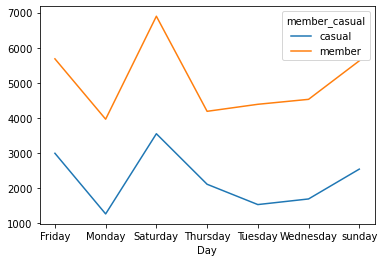

In [43]:
df_plot.plot(kind='line', stacked=True);

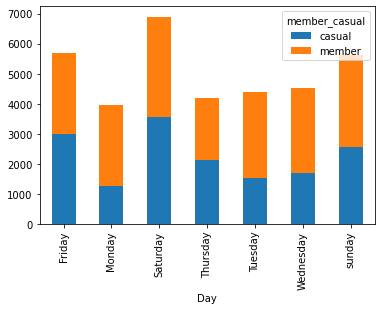

In [44]:
df_plot.plot(kind='bar', stacked=True);

In [45]:
w_48.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at                      object
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id               float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
time                          object
Week_Number                    int64
Day                           object
dtype: object

In [46]:
w_48_23 = w_48[w_48['date'] == '2020-11-16']
w_48_23

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,time,Week_Number,Day


In [47]:
new1 = w_48_23.groupby([pd.Grouper(key='started_at',freq='H')]).size().reset_index(name='count').sort_values('started_at', ascending= True)
new1


,started_at,count


In [48]:
new1['Day'] = 'Monday'
new1

,started_at,count,Day


In [49]:
new.info()

NameError: name 'new' is not defined

In [188]:
plt.figure(figsize = (10,6))
sns.barplot(x= new.index , y = 'count', data= new1 )

ValueError: Grouper and axis must be same length

In [189]:
w_48_24 = w_48[w_48['date'] == '2020-11-17']
w_48_24

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,time,Week_Number
62,FC29B5D2355D22AB,docked_bike,2020-11-17 14:53:31,2020-11-17 15:05:46,11th & Park Rd NW,581.0,8th & O St NW,413.0,38.931322,-77.028247,38.908640,-77.022770,casual,2020-11-17,14:53:31,47
168,58A50037D0010B65,electric_bike,2020-11-17 14:13:19,2020-11-17 14:31:03,5th & K St NW,62.0,NaN,NaN,38.903139,-77.019005,38.900000,-77.040000,casual,2020-11-17,14:13:19,47
169,3963EFC61EEB184C,electric_bike,2020-11-17 14:37:13,2020-11-17 14:50:13,NaN,NaN,5th & K St NW,62.0,38.900000,-77.040000,38.903009,-77.019079,casual,2020-11-17,14:37:13,47
170,5E869D6560E5F058,electric_bike,2020-11-17 07:42:16,2020-11-17 07:56:56,NaN,NaN,NaN,NaN,38.900000,-77.000000,38.870000,-76.990000,casual,2020-11-17,07:42:16,47
171,AFF9325017ACC58A,electric_bike,2020-11-17 07:38:32,2020-11-17 07:40:58,NaN,NaN,NaN,NaN,38.900000,-77.000000,38.900000,-77.000000,casual,2020-11-17,07:38:32,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175453,FB36431E9B135115,electric_bike,2020-11-17 16:45:34,2020-11-17 16:56:16,NaN,NaN,NaN,NaN,38.910000,-77.020000,38.930000,-77.030000,casual,2020-11-17,16:45:34,47
175721,B109040C9D230CB1,electric_bike,2020-11-17 23:34:04,2020-11-17 23:48:01,NaN,NaN,NaN,NaN,38.940000,-77.020000,38.900000,-77.010000,casual,2020-11-17,23:34:04,47
175723,1D333478A30E88FF,electric_bike,2020-11-17 23:13:18,2020-11-17 23:19:42,NaN,NaN,NaN,NaN,38.920000,-77.020000,38.930000,-77.030000,casual,2020-11-17,23:13:18,47
175724,CAA5D0FD2E59A0A7,electric_bike,2020-11-17 20:57:26,2020-11-17 21:04:23,20th & L St NW,266.0,7th & T St NW,22.0,38.903219,-77.045177,38.915498,-77.022543,casual,2020-11-17,20:57:26,47


In [190]:
new2 = w_48_24.groupby([pd.Grouper(key='started_at',freq='H')]).size().reset_index(name='count').sort_values('started_at', ascending= True)
new2

,started_at,count
0,2020-11-17 00:00:00,21
1,2020-11-17 01:00:00,13
2,2020-11-17 02:00:00,3
3,2020-11-17 03:00:00,7
4,2020-11-17 04:00:00,16
5,2020-11-17 05:00:00,45
6,2020-11-17 06:00:00,115
7,2020-11-17 07:00:00,245
8,2020-11-17 08:00:00,349
9,2020-11-17 09:00:00,262


In [191]:
new2['Day'] = 'Tuesday'
new2

,started_at,count,Day
0,2020-11-17 00:00:00,21,Tuesday
1,2020-11-17 01:00:00,13,Tuesday
2,2020-11-17 02:00:00,3,Tuesday
3,2020-11-17 03:00:00,7,Tuesday
4,2020-11-17 04:00:00,16,Tuesday
5,2020-11-17 05:00:00,45,Tuesday
6,2020-11-17 06:00:00,115,Tuesday
7,2020-11-17 07:00:00,245,Tuesday
8,2020-11-17 08:00:00,349,Tuesday
9,2020-11-17 09:00:00,262,Tuesday


In [192]:
w_48_25 = w_48[w_48['date'] == '2020-11-18']
w_48_25
new3 = w_48_25.groupby([pd.Grouper(key='started_at',freq='H')]).size().reset_index(name='count').sort_values('started_at', ascending= True)
new3
new3['Day'] = 'Wednesday'
new3

,started_at,count,Day
0,2020-11-18 00:00:00,17,Wednesday
1,2020-11-18 01:00:00,10,Wednesday
2,2020-11-18 02:00:00,5,Wednesday
3,2020-11-18 03:00:00,7,Wednesday
4,2020-11-18 04:00:00,21,Wednesday
5,2020-11-18 05:00:00,32,Wednesday
6,2020-11-18 06:00:00,92,Wednesday
7,2020-11-18 07:00:00,204,Wednesday
8,2020-11-18 08:00:00,292,Wednesday
9,2020-11-18 09:00:00,256,Wednesday


In [193]:
w_48_26 = w_48[w_48['date'] == '2020-11-19']
w_48_26
new4 = w_48_26.groupby([pd.Grouper(key='started_at',freq='H')]).size().reset_index(name='count').sort_values('started_at', ascending= True)
new4
new4['Day'] = 'Thursday'
new4

,started_at,count,Day
0,2020-11-19 00:00:00,32,Thursday
1,2020-11-19 01:00:00,17,Thursday
2,2020-11-19 02:00:00,9,Thursday
3,2020-11-19 03:00:00,5,Thursday
4,2020-11-19 04:00:00,17,Thursday
5,2020-11-19 05:00:00,37,Thursday
6,2020-11-19 06:00:00,101,Thursday
7,2020-11-19 07:00:00,208,Thursday
8,2020-11-19 08:00:00,302,Thursday
9,2020-11-19 09:00:00,194,Thursday


In [194]:
w_48_27 = w_48[w_48['date'] == '2020-11-20']
w_48_27
new5 = w_48_27.groupby([pd.Grouper(key='started_at',freq='H')]).size().reset_index(name='count').sort_values('started_at', ascending= True)
new5
new5['Day'] = 'Friday'
new5

,started_at,count,Day
0,2020-11-20 00:00:00,30,Friday
1,2020-11-20 01:00:00,16,Friday
2,2020-11-20 02:00:00,10,Friday
3,2020-11-20 03:00:00,16,Friday
4,2020-11-20 04:00:00,14,Friday
5,2020-11-20 05:00:00,29,Friday
6,2020-11-20 06:00:00,102,Friday
7,2020-11-20 07:00:00,225,Friday
8,2020-11-20 08:00:00,292,Friday
9,2020-11-20 09:00:00,253,Friday


In [195]:
w_48_28 = w_48[w_48['date'] == '2020-11-21']
w_48_28
new6 = w_48_28.groupby([pd.Grouper(key='started_at',freq='H')]).size().reset_index(name='count').sort_values('started_at', ascending= True)
new6
new6['Day'] = 'Saturday'
new6

,started_at,count,Day
0,2020-11-21 00:00:00,90,Saturday
1,2020-11-21 01:00:00,43,Saturday
2,2020-11-21 02:00:00,21,Saturday
3,2020-11-21 03:00:00,12,Saturday
4,2020-11-21 04:00:00,15,Saturday
5,2020-11-21 05:00:00,13,Saturday
6,2020-11-21 06:00:00,44,Saturday
7,2020-11-21 07:00:00,108,Saturday
8,2020-11-21 08:00:00,195,Saturday
9,2020-11-21 09:00:00,369,Saturday


In [196]:
w_48_29 = w_48[w_48['date'] == '2020-11-22']
w_48_29
new7 = w_48_29.groupby([pd.Grouper(key='started_at',freq='H')]).size().reset_index(name='count').sort_values('started_at', ascending= True)
new7
new7['Day'] = 'Sunday'
new7

,started_at,count,Day
0,2020-11-22 00:00:00,88,Sunday
1,2020-11-22 01:00:00,38,Sunday
2,2020-11-22 02:00:00,17,Sunday
3,2020-11-22 03:00:00,24,Sunday
4,2020-11-22 04:00:00,11,Sunday
5,2020-11-22 05:00:00,17,Sunday
6,2020-11-22 06:00:00,40,Sunday
7,2020-11-22 07:00:00,85,Sunday
8,2020-11-22 08:00:00,160,Sunday
9,2020-11-22 09:00:00,268,Sunday


In [197]:
new = pd.concat([new1,new2,new3,new4,new5,new6,new7])
new

,started_at,count,Day
0,2020-11-16 00:00:00,36,Monday
1,2020-11-16 01:00:00,14,Monday
2,2020-11-16 02:00:00,8,Monday
3,2020-11-16 03:00:00,7,Monday
4,2020-11-16 04:00:00,14,Monday
...,...,...,...
19,2020-11-22 19:00:00,176,Sunday
20,2020-11-22 20:00:00,132,Sunday
21,2020-11-22 21:00:00,95,Sunday
22,2020-11-22 22:00:00,104,Sunday


In [158]:
new["Day"].dtypes

dtype('O')

<AxesSubplot:ylabel='count'>

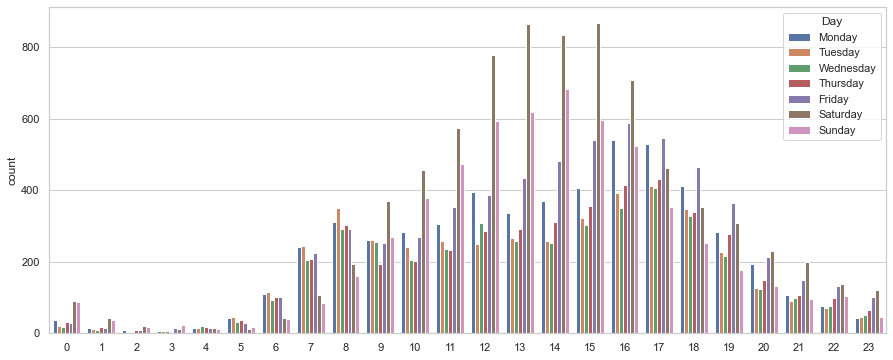

In [198]:
plt.figure(figsize = (15,6))
sns.barplot(x=new.index,y='count', data=new, hue='Day')

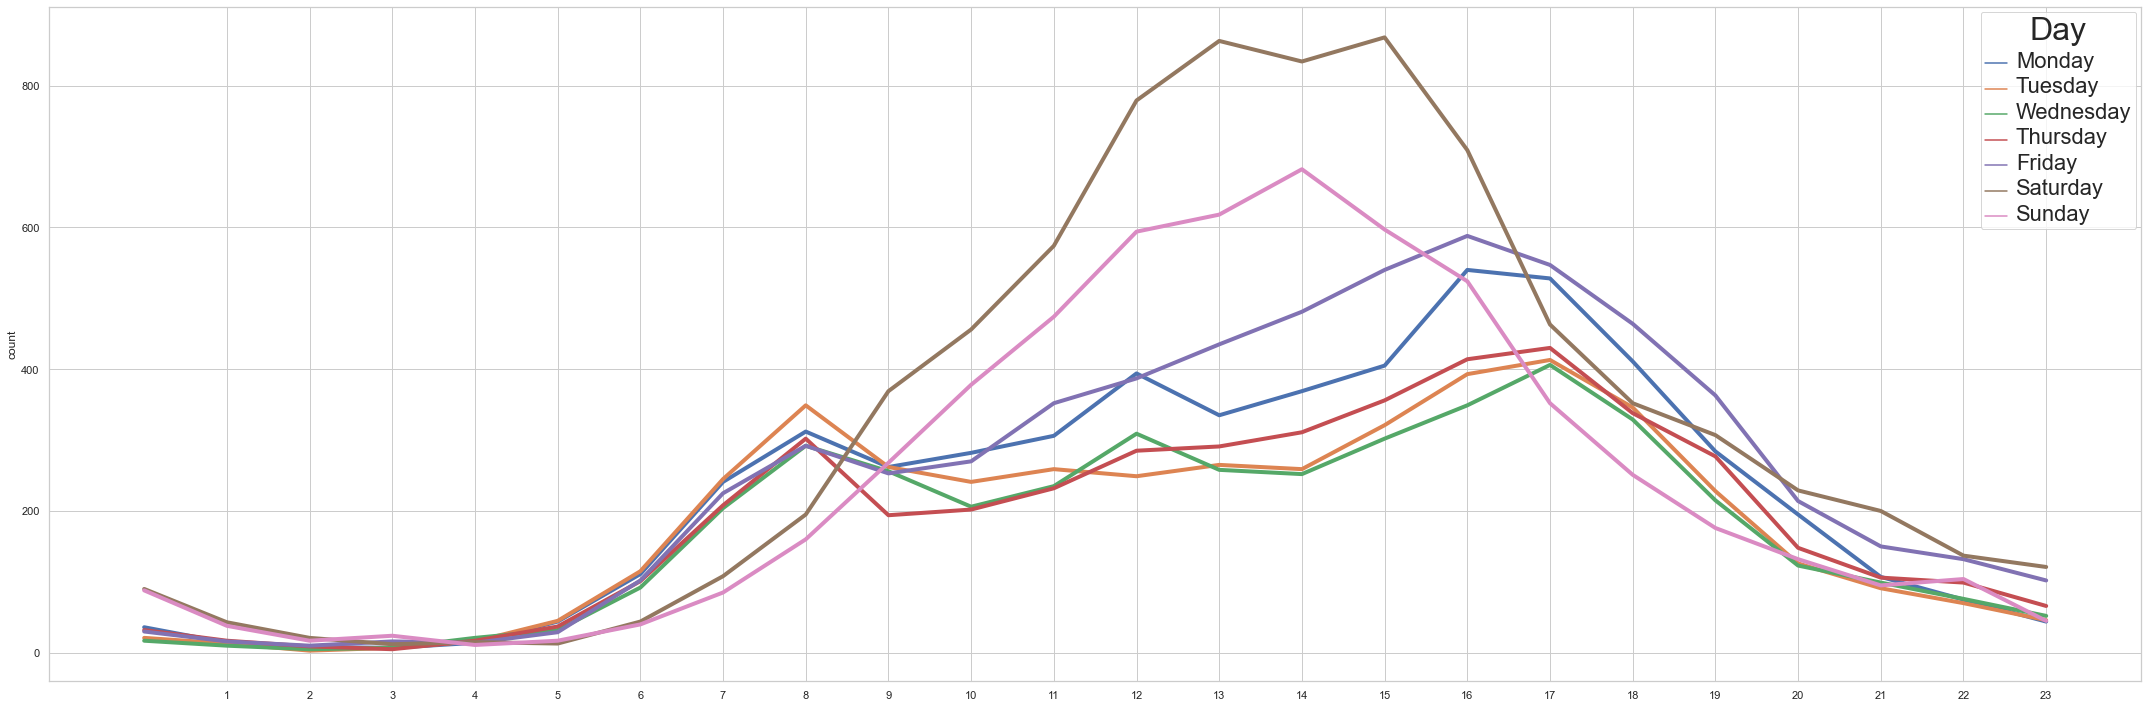

In [201]:
sns.set(style="whitegrid")
plt.figure(figsize = (30,10))
ax = sns.lineplot(x=new.index,y='count', data=new, hue='Day',linewidth=4)
ax.set_xticks(range(1,24))
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32')
plt.tight_layout()
plt.savefig("Hourly unique ride throw the whole week-47 ", dpi=400, );

In [133]:
data['Week_Number'].value_counts()

45    55305
46    41344
47    37915
48    35291
44     3676
49     2258
Name: Week_Number, dtype: int64

In [134]:
w_48.loc[w_48.started_at.dt.hour==12].sort_values('time')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,time,Week_Number
58798,3F510B6C68CB0945,docked_bike,2020-11-27 12:00:01,2020-11-27 14:07:53,10th St & L'Enfant Plaza SW,443.0,10th St & L'Enfant Plaza SW,443.0,38.884322,-77.026010,38.884323,-77.026010,casual,2020-11-27,12:00:01,48
72525,E7C488FF59BF6F49,docked_bike,2020-11-28 12:00:02,2020-11-28 12:48:44,Metro Center / 12th & G St NW,132.0,Jefferson Dr & 14th St SW,185.0,38.898364,-77.027869,38.888553,-77.032427,casual,2020-11-28,12:00:02,48
137921,27142EA217C64E1B,docked_bike,2020-11-27 12:00:03,2020-11-27 14:44:32,Washington Blvd & 10th St N,202.0,Barton St & 10th St N,278.0,38.884734,-77.093485,38.884961,-77.087770,casual,2020-11-27,12:00:03,48
68101,89244E1CC2BE7C2E,docked_bike,2020-11-25 12:00:03,2020-11-25 13:17:54,Roosevelt Island,228.0,Prince St & Union St,237.0,38.896553,-77.067140,38.803124,-77.040363,casual,2020-11-25,12:00:03,48
20993,2B88455B3C0CA359,electric_bike,2020-11-28 12:00:05,2020-11-28 13:01:39,22nd & I St NW / Foggy Bottom,276.0,NaN,NaN,38.900987,-77.048709,38.980000,-77.100000,member,2020-11-28,12:00:05,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123023,7379E85236D8582D,docked_bike,2020-11-26 12:59:57,2020-11-26 14:00:35,Massachusetts Ave & Dupont Circle NW,24.0,Massachusetts Ave & Dupont Circle NW,24.0,38.910100,-77.044400,38.910100,-77.044400,member,2020-11-26,12:59:57,48
32635,26F5B51A7B939A12,docked_bike,2020-11-28 12:59:57,2020-11-28 13:45:19,17th & K St NW / Farragut Square,149.0,17th & K St NW / Farragut Square,149.0,38.902061,-77.038322,38.902061,-77.038322,casual,2020-11-28,12:59:57,48
40024,707FCB8B2EFB6AEC,electric_bike,2020-11-29 12:59:57,2020-11-29 13:02:30,24th & N St NW,272.0,20th & O St NW / Dupont South,150.0,38.906568,-77.051331,38.908709,-77.045194,member,2020-11-29,12:59:57,48
19368,932B2ED328C7213F,electric_bike,2020-11-24 12:59:57,2020-11-24 13:05:01,14th & Irving St NW,461.0,Columbia Rd & Georgia Ave NW,77.0,38.928599,-77.032322,38.928130,-77.023794,member,2020-11-24,12:59:57,48


In [135]:
hourly = w_48.groupby([pd.Grouper(key='started_at',freq='H')]).size().reset_index(name='count').sort_values('count', ascending=False)
hourly.head(40)

,started_at,count
134,2020-11-28 14:00:00,916
135,2020-11-28 15:00:00,820
133,2020-11-28 13:00:00,808
159,2020-11-29 15:00:00,726
158,2020-11-29 14:00:00,714
132,2020-11-28 12:00:00,707
111,2020-11-27 15:00:00,674
136,2020-11-28 16:00:00,661
110,2020-11-27 14:00:00,653
157,2020-11-29 13:00:00,639


In [136]:
# z=pl_us.groupby(['Country'])['Price'].mean().reset_index().sort_values('Price',ascending=False)
# z[['Country','Price']]

In [137]:
hourly.sort_values('count', ascending= False)

,started_at,count
134,2020-11-28 14:00:00,916
135,2020-11-28 15:00:00,820
133,2020-11-28 13:00:00,808
159,2020-11-29 15:00:00,726
158,2020-11-29 14:00:00,714
...,...,...
76,2020-11-26 04:00:00,8
125,2020-11-28 05:00:00,6
75,2020-11-26 03:00:00,6
147,2020-11-29 03:00:00,6


In [138]:
w_47 = data[data['Week_Number'] == 47]
w_47

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,time,Week_Number
2,7A6B7A9A2867E5E4,docked_bike,2020-11-20 15:36:14,2020-11-20 15:49:32,14th & L St NW,433.0,15th St & Constitution Ave NW,531.0,38.903658,-77.031737,38.892244,-77.033234,casual,2020-11-20,15:36:14,47
4,0270180623442083,docked_bike,2020-11-16 09:30:05,2020-11-16 09:50:22,3rd & Elm St NW,80.0,10th & Florida Ave NW,82.0,38.917622,-77.015970,38.920387,-77.025672,member,2020-11-16,09:30:05,47
7,B58F942F3085FA41,docked_bike,2020-11-20 17:03:45,2020-11-20 17:18:31,14th & V St NW,14.0,3rd & Elm St NW,80.0,38.917764,-77.032096,38.917622,-77.015970,member,2020-11-20,17:03:45,47
8,3CF830FE850B7AD6,docked_bike,2020-11-20 12:47:13,2020-11-20 12:51:34,21st St & G st NW,688.0,20th & L St NW,266.0,38.898308,-77.046402,38.903584,-77.044789,member,2020-11-20,12:47:13,47
9,D57D01E5ADD7741C,docked_bike,2020-11-22 10:04:49,2020-11-22 10:12:19,14th & R St NW,26.0,14th & R St NW,26.0,38.913046,-77.032008,38.913046,-77.032008,member,2020-11-22,10:04:49,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175773,F409B8B1FFE94ECD,electric_bike,2020-11-18 17:45:38,2020-11-18 17:55:24,Thomas Circle,178.0,14th & Irving St NW,461.0,38.905841,-77.032578,38.928573,-77.032322,casual,2020-11-18,17:45:38,47
175774,F908C78120B031EA,electric_bike,2020-11-18 08:04:11,2020-11-18 08:11:29,Columbia Rd & Belmont St NW,75.0,Vermont Ave & I St NW,462.0,38.920692,-77.043575,38.901280,-77.034639,casual,2020-11-18,08:04:11,47
175775,BE2941D8312A81FB,electric_bike,2020-11-18 18:32:35,2020-11-18 18:38:48,14th & Irving St NW,461.0,Columbia Rd & Belmont St NW,75.0,38.928597,-77.032242,38.920772,-77.043719,casual,2020-11-18,18:32:35,47
175776,9CE92BEDDD5C9DD7,electric_bike,2020-11-18 09:11:36,2020-11-18 09:44:26,14th & Belmont St NW,81.0,Georgia Ave & Spring St,348.0,38.921028,-77.031751,38.999259,-77.031436,casual,2020-11-18,09:11:36,47


In [139]:
hourly = w_47.groupby([pd.Grouper(key='started_at',freq='H')]).size().reset_index(name='count').sort_values('count', ascending=False)
hourly.head(40)

,started_at,count
135,2020-11-21 15:00:00,868
133,2020-11-21 13:00:00,863
134,2020-11-21 14:00:00,834
132,2020-11-21 12:00:00,779
136,2020-11-21 16:00:00,709
158,2020-11-22 14:00:00,682
157,2020-11-22 13:00:00,618
159,2020-11-22 15:00:00,597
156,2020-11-22 12:00:00,594
112,2020-11-20 16:00:00,588


In [140]:
data['date'] = data['started_at'].dt.date

data['time'] = data['started_at'].dt.time